# Angewante ChemE

In [8]:
import os
os.chdir(r"C:\Users\Trisha\Desktop\EL")
cwd = os.getcwd()
print(cwd)

import numpy as np
from datetime import datetime
from selenium import webdriver
# from chromedriver_py import binary_path # this will get you the path variable
from bs4 import BeautifulSoup
import pandas as pd 

C:\Users\Trisha\Desktop\EL


In [133]:
driver = webdriver.Firefox()
site = 'https://onlinelibrary.wiley.com/loi/15213773/year/'
links = list();
for i in range(1994,2020):
    url = site+str(i)
    driver.get(url) #"https://pubs.acs.org/toc/iecred/28/10")
    content = driver.page_source
    soup = BeautifulSoup(content)
    for issue in soup.findAll('div',attrs={'class':"loi__issue"}):
        link=(issue.find('a'))
        links.append('https://onlinelibrary.wiley.com'+link.get('href'))
driver.close()

In [135]:
# driver = webdriver.Firefox()
# print(len(links))
# for i in links[-1:]:
#     url = i
#     driver.get(url) #"https://pubs.acs.org/toc/iecred/28/10")
#     content = driver.page_source
#     soup = BeautifulSoup(content)
# driver.close()

In [136]:
# print(soup.prettify())

In [151]:
doi = list(); authors = list(); journal  = list(); Dates = list(); Abs = list();
ArtType = list(); topics = list(); volume = list(); Issue = list(); 
ArtGenre = list(); 
# FirstAuthor = list(); SecondAuthor=list(); 
nAuthors = list(); CorrespAuthor = list()

driver = webdriver.Firefox()

for i in links: #[-1:]
    url = i
    driver.get(url) #"https://pubs.acs.org/toc/iecred/28/10")
    content = driver.page_source
    soup = BeautifulSoup(content)
    
    VI = soup.find('div',attrs={'class':"cover-image__parent-item"}).text.replace(',','')
    VI = VI.replace('‐',' ')
    VolIss = [int(i) for i in VI.split() if i.isdigit()]

    for art in soup.findAll('a',attrs={'class':"issue-item__title visitable"}):
        parent = art.find_parent('div',attrs={'class':"issue-item"})
        link=art.get('href').strip('/doi/')
        title = (art.find('h2').text)
        if art.find_parent('div',attrs={'class':"issue-item"}).find_previous_sibling('h4'):
            genre = parent.find_previous_sibling('h4').text
        else:
            genre = 'NA'
        genre = genre.replace(' | Hot Paper', '')
        genre = genre.replace(' | Very Important Paper', '')

        name = parent.findAll('span',attrs={'class':"author-style"})
        auth = list()
        if name:
            for ai in name:
                aIn = ai.text.replace('\n','')
                aIn = aIn.replace('Dr.','')            
                aIn = aIn.replace('Prof.','')
                auth.append(aIn)
        else:
            auth.append('NA')

        #     vol = art.find('span',attrs={'class':"issue-item_vol-num"})
        #     iss = art.find('span',attrs={'class':"issue-item_issue-num"})
        jour = 'Angewandte Chemie'
        date = parent.find('li',attrs={'class':"ePubDate"}).findAll('span')[1].text
#         date = datetime.strptime(date.text, '%B %Y').date()
        absF = (parent.find('div',attrs={'class':"toc-item__abstract abstract-preview"}))
        #     atype = art.findAll('span',attrs={'class':"issue-item_type"})

        doi.append(link) 
        topics.append(title) 
        ArtGenre.append(genre)
        authors.append(auth)
        CorrespAuthor.append(auth[-1])
        nAuthors.append(len(auth))
        Dates.append(date)
        if absF:
            abstract = absF.find('p')
            Abs.append(abstract.text)
        else:
            Abs.append('NA')
        journal.append(jour)
        volume.append(VolIss[0])
        if len(VolIss)>=2:
            Issue.append(VolIss[1])
        else:
            Issue.append('NA')
        ArtType.append('NA')
        
driver.close()

df = pd.DataFrame({'Category':ArtGenre,'Corresponding Author':CorrespAuthor,'#Authors':nAuthors,'Title':topics,
                    'Date':Dates,'Journal':journal,'Volume':volume,'Issue':Issue,
                    'Abstract':Abs,'DOI':doi,'Authors':authors,'Type':ArtType}) 
df.to_csv('Angewandte_articles.csv', index=False, encoding='utf-8')


,Category,Corresponding Author,#Authors,Title,Date,Journal,Volume,Issue,Abstract,DOI,Authors,Type
0,NA,NA,1,Cover Picture (Angew. Chem. Int. Ed. Engl. 22/...,"December 5, 1994",Angewandte Chemie,33,22,The cover picture shows a host molecule constr...,10.1002/anie.199422291,[NA],NA
1,NA,NA,1,Graphical Abstract (Angew. Chem. Int. Ed. Engl...,"December 5, 1994",Angewandte Chemie,33,22,NA,10.1002/anie.199422311,[NA],NA
2,NA,Klaus Weber,2,From an Insecticide to Plato's Universe—The Pa...,"December 5, 1994",Angewandte Chemie,33,22,"The productive interplay of planning, intuitio...",10.1002/anie.199422391,"[ Horst Prinzbach, Klaus Weber]",NA
3,NA,Klaus Schwochau,1,"Technetium Radiopharmaceuticals—Fundamentals, ...","December 5, 1994",Angewandte Chemie,33,22,"Almost optimal nuclear properties, ready avail...",10.1002/anie.199422581,[ Klaus Schwochau],NA
4,NA,Edwin C. Constable,1,Taking Fullerenes from Large Molecules to Supr...,"December 5, 1994",Angewandte Chemie,33,22,New perspectives for the purification of fulle...,10.1002/anie.199422691,[ Edwin C. Constable],NA
...,...,...,...,...,...,...,...,...,...,...,...,...
50629,C−H Activation,Xingwei Li,3,Rhodium(III)‐Catalyzed Enantioselective Coupli...,18 November 2018,Angewandte Chemie,58,1,Silver screen: CpxRhIII/AgSbF6‐catalyzed enant...,10.1002/anie.201811998,"[ Xifa Yang, Guangfan Zheng, Xingwei Li]",NA
50630,Gas Separation,Haihui Wang,6,Ultra‐Tuning of the Aperture Size in Stiffened...,05 November 2018,Angewandte Chemie,58,1,MOF membrane: A ≈500 nm‐thin hybrid mixed‐link...,10.1002/anie.201811638,"[ Qianqian Hou, Ying Wu, Sheng Zhou, Yany...",NA
50631,Ion–Protein Interactions,Johannes Hunger,7,Specific Ion Effects on an Oligopeptide: Biden...,07 November 2018,Angewandte Chemie,58,1,Embrace the protein: The guanidinium cation ca...,10.1002/anie.201811029,"[ Vasileios Balos, Bogdan Marekha, Christi...",NA
50632,"B,N‐Heterocycles",Holger Braunschweig,8,"1,2,3‐Diazaborinine: A BN Analogue of Pyridine...",05 November 2018,Angewandte Chemie,58,1,Nitrile & error: A new pathway for the ring ex...,10.1002/anie.201811601,"[ Felix Lindl, Shujuan Lin, Ivo Krummenach...",NA


In [ ]:
# art = soup.find('div',attrs={'class':"gs_ri"})
# cite = (art.findNext('div',attrs={'class':"gs_fl"}))
# if len(cite.text) > 3:
#     print(int((cite.text).split()[2]))
# else:
#     print(0)
# #     print(cite.findAll('a',href=True)[2]).text

In [2]:
import pandas as pd
df = pd.read_csv('Angewandte_articles.csv')
print(len(df))

50634


In [169]:
# def Update(x):
#     x.Category = 'na'
#     return x
# for i in df.index:
#     if pd.isnull(df.Category[i]): #
#         df.loc[i,:] = Update(df.copy().loc[i,:])
df['Category'] = df.apply(lambda x : "na" if pd.isnull(x.Category) else x['Category'].lower(), axis = 1)
s = pd.value_counts(df['Category'])
df['Category'] = df.apply(lambda x : "na" if ((s[x.Category])<10) else x['Category'].lower(), axis = 1)

synthetic methods            843
asymmetric catalysis         636
organocatalysis              335
heterogeneous catalysis      314
natural product synthesis    303
supramolecular chemistry     283
homogeneous catalysis        275
natural products             272
electrocatalysis             218
metal–organic frameworks     209
photocatalysis               204
ch activation               189
photochemistry               181
heterocycles                 178
cross‐coupling               176
total synthesis              164
asymmetric synthesis         157
drug delivery                146
c−h activation               144
nanostructures               142
self‐assembly                136
nmr spectroscopy             132
electrochemistry             127
biocatalysis                 123
surface chemistry            121
biosynthesis                 107
biosensors                   104
fluorescent probes            93
analytical methods            87
gold catalysis                82
heterocycl

C:\Users\Trisha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 63743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Trisha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 63743 missing from current font.
  font.set_text(s, 0, flags=flags)


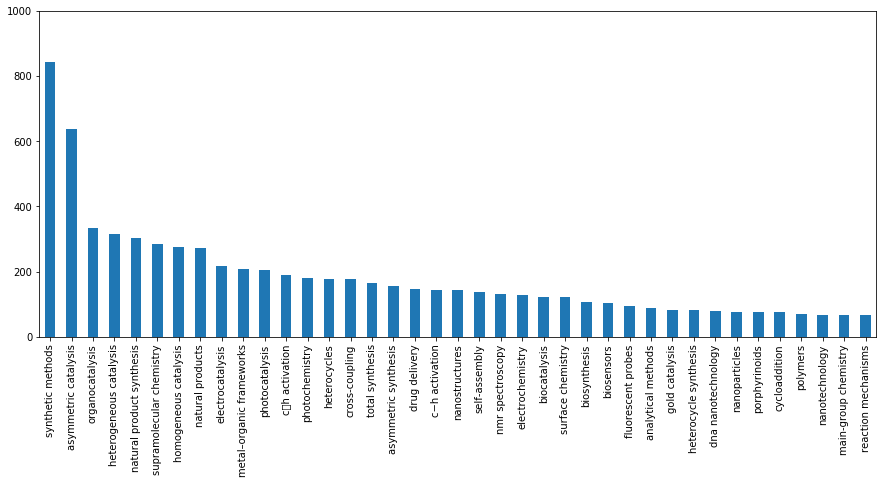

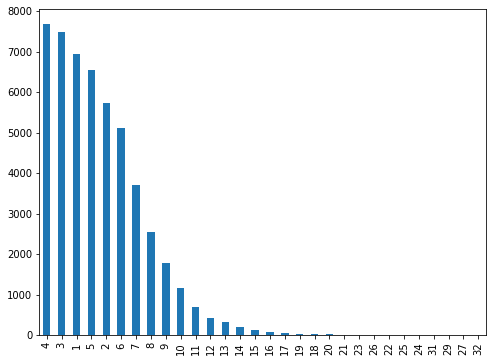

In [182]:
s = pd.value_counts(df['Category'])[1:40]
fig, axs = plt.subplots(1,1,figsize=(15, 6))
s.plot.bar()
axs.set_ylim([0, 1000])
plt.show()

fig, axs = plt.subplots(1,1,figsize=(8, 6))
pd.value_counts(df['#Authors']).plot.bar()
plt.show()


In [107]:
driver = webdriver.Firefox()
citations = list()

for doi in df.DOI:
    url = 'https://pubs.acs.org/doi/' + doi 
#     print(url)
#     headers = {}
#     headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:50.0) Gecko/20100101 Firefox/50.0'
#     req = urllib.request.Request(url, headers=headers)
#     resp = urllib.request.urlopen(req)
#     content = resp.read()
    
    driver.get(url) #"https://pubs.acs.org/toc/iecred/28/10")
    content = driver.page_source
    soup = BeautifulSoup(content)
    art = soup.findAll('div',attrs={'class':"articleMetrics-val"})[2]
    cite = (art.text)
    
    citations.append(cite)

driver.close()
df['Citations'] = citations
df.to_csv('IECR_articles.csv', index=False, encoding='utf-8')

In [ ]:
# df = pd.read_csv('IECR_articles.csv')\
# df.Volume = df.apply(lambda x: int(x['Volume'].strip('<span class="issue-item_vol-num"> </')), axis=1)
# df.Issue = df.apply(lambda x: int(x['Issue'].strip('<span class="issue-item_issue-num"> </span')), axis=1)
# df.DOI = df.apply(lambda x: x['DOI'].strip('/doi/'),axis=1)
# df.Type = df.apply(lambda x: x['Type'].strip(' ( )'),axis=1)
# df.head()